# HW1: Introduction to RL
> - Full Name: **Amir Kooshan Fattah Hesari**
> - Student ID: **401102191**


This notebook is designed for is designed to provide hands-on experience with RL modeling, algorithm implementation, and performance evaluation. Students will explore RL concepts through predefined environments and custom-designed settings.

Follow the instructions in each section to complete the homework.

## Setup Instructions
Seting up RL dependecies for first time may be challenging. Some  torch or gymnasium (Sklearn lib in SL world!) environments need additional set up on your system. If you encountered error and failure after hours of search and try, feel free to be in contact with TA's.  Run the following commands to install dependencies before starting the notebook:



In [57]:
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!apt-get install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.12).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [58]:
!pip install pyvirtualdisplay > /dev/null 2>&1
!pip install swig
!pip install stable-baselines3 "gymnasium[all]" pygame matplotlib numpy pandas

Hamid is CE student who loves learning about RL. He tried to use **Gymnasium** and **Stable-Baselines3** to solve games he played as a kid.  

He started to list the games which was provided in gymnasium library.

In [59]:
from gymnasium import envs

all_envs = envs.registry
env_ids = [env_spec  for env_spec in all_envs]
print("Gymnasium envs listed:",sorted(env_ids))

Gymnasium envs listed: ['Acrobot-v1', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Ant-v5', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'Blackjack-v1', 'CarRacing-v3', 'CartPole-v0', 'CartPole-v1', 'CliffWalking-v0', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'GymV21Environment-v0', 'GymV26Environment-v0', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'HalfCheetah-v5', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Hopper-v5', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'Humanoid-v5', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'HumanoidStandup-v5', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'InvertedDoublePendulum-v5', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedPendulum-v5', 'LunarLander-v3', 'LunarLanderContinuous-v3', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Pusher-v2', 'Pusher-v4', 'Pusher-v5', 'Reacher-v2', 'Reacher-v4', 'Reacher-v5', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Swimmer-v5', 'Taxi-v3', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'W

Then He selected Mountain Car Game to work with:

In [60]:
import gymnasium as gym
env = gym.make("MountainCar-v0", render_mode="rgb_array", goal_velocity=0.1)

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

print("Action Example: {}".format(env.action_space.sample()))
print("State Example: {}".format(env.observation_space.sample()))

Action Space Discrete(3)
State Space Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action Example: 2
State Example: [-0.42770866  0.00178606]


Hamid wanted to visualize the env for better understandig of gym envs. He had two options:


1.   rendering inside the colab
2.   rendering as video file



For ploting the game **inside** the colab he used **pyvirtualdisplay** package:

In [61]:
from pyvirtualdisplay import Display
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

display = Display(visible=0, size=(400, 300))
display.start()

So He started modify the code to learn how action works and plot it. He selected action of

 *`2: Accelerate to the right`*

For every state of car.

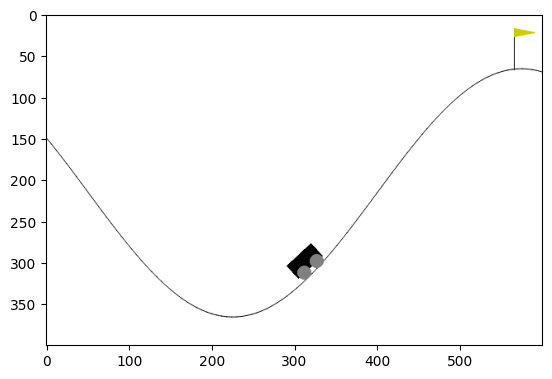

In [ ]:
env.reset()
prev_screen = env.render( )
plt.imshow(prev_screen)

for i in range(40):
  # action = env.action_space.sample()  # Random action
  action = 2 # Action Hamid modified to practice
  obs, reward,terminated, truncated, info = env.step(action)
  screen = env.render()

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if terminated:
    break

ipythondisplay.clear_output(wait=True)
env.close()

But for saving game as **video** he defined a function (it's okay if you don't understand just try to run the code and see the output, then try to modify envs!):

In [ ]:
import logging
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo

training_period = 250  # record the agent's episode every 250
num_training_episodes = 1000  # total number of training episodes

env = gym.make("MountainCar-v0", render_mode="rgb_array")
env = RecordVideo(env, video_folder="MountainCar-v0-agent", name_prefix="training",
                  episode_trigger=lambda x: x % training_period == 0)
env = RecordEpisodeStatistics(env)

for episode_num in range(num_training_episodes):
    obs, info = env.reset()

    episode_over = False
    while not episode_over:
        action = env.action_space.sample()  # replace with actual agent
        obs, reward, terminated, truncated, info = env.step(action)

        episode_over = terminated or truncated

    logging.info(f"episode-{episode_num}", info["episode"])
env.close()

The videos are in MountainCar-v0-agent folder of your colab folder.

But the car couldn't reach the goal state on top of the right hill. So he tried to implement RL algorithm for learning it

In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

# Parallel environments can bet set but Hamid set 1 env
vec_env = make_vec_env("MountainCar-v0", n_envs=1)

model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=25000)
model.save("ppo_MountainCar")

del model # remove to demonstrate saving and loading


Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -200     |
| time/              |          |
|    fps             | 844      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -200         |
| time/                   |              |
|    fps                  | 693          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0008540177 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.1         |
|    explained_variance   | 0.000188     

**Loading saved model**

After training model using PPO and saving it, Hamid started to load the model with the name he saved in cell above:

In [ ]:
model = PPO.load("ppo_MountainCar")

obs = vec_env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    print(obs, rewards, dones, info)
    if dones[0]:
      break

[[-0.4505932  -0.00054718]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.45168358 -0.00109035]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.4543091  -0.00262554]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.4564506  -0.00214148]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.4600923  -0.00364169]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.4652074  -0.00511512]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.47075823 -0.00555082]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.47670367 -0.00594546]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.4829997  -0.00629602]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.48959947 -0.00659976]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.49645376 -0.00685431]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.50251144 -0.00605767]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.5097272  -0.00721572]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.5180469  -0.00831973

# **Task 1: Solving Predefined Environments (45 points)**
1.1. Choose two environments from the list which are implemented by  other developers and communities and train RL agents using stable-baselines3. Don't forget to check workshop notebook.

**Environments:**
- [CartPole](https://gymnasium.farama.org/environments/classic_control/cart_pole/)
- [FrozenLake](https://gymnasium.farama.org/environments/toy_text/frozen_lake/)
- [Taxi](https://gymnasium.farama.org/environments/toy_text/taxi/)
- Flappy Bird (Custom env which you can google it)

📊 1.2. Algorithm Comparison:


 Compare RL algorithms and results (at least two algorithms e.g., PPO, DQN) based on:
- Total reward over time
- Hyperparameters (check the docs)


Env1 implementation. [ place for your code ]




In [ ]:
# TODO's:
# Import env 1
# Train env 1
# plot env1 total rewards on sepearate lines for each algorithm
# modify hyperparameters and plot reward curves
env1 = gym.make("CartPole-v1" , render_mode = "rgb_array")
print(env1.action_space)
print(env1.observation_space)


Discrete(2)
Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)


In [ ]:
#training with different algorithms
from stable_baselines3 import PPO,A2C,DQN
vec_env = make_vec_env("CartPole-v1", n_envs=1)
model = PPO("MlpPolicy",vec_env, verbose=1,tensorboard_log="./tensorboard")
model.learn(total_timesteps=10000)
del model # remove
model = A2C("MlpPolicy",vec_env, verbose=1,tensorboard_log="./tensorboard")
model.learn(total_timesteps=10000)
del model # remove
model = DQN("MlpPolicy",vec_env, verbose=1,tensorboard_log="./tensorboard")
model.learn(total_timesteps=10000)
del model # remove

Using cpu device
Logging to ./tensorboard/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.3     |
|    ep_rew_mean     | 21.3     |
| time/              |          |
|    fps             | 817      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26.6        |
|    ep_rew_mean          | 26.6        |
| time/                   |             |
|    fps                  | 679         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009199889 |
|    clip_fraction        | 0.103       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance 

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
#tensorboard --logdir ./tensorboard

In [ ]:
#algorithms and different hyperparameters
hyperparams_list_ppo = [
    {
        "learning_rate": 4e-4,
        "n_steps": 1536,
        "batch_size": 96,
        "gamma": 0.985,
        "clip_range": 0.25
    },
    {
        "learning_rate": 8e-4,
        "n_steps": 768,
        "batch_size": 48,
        "gamma": 0.96,
        "clip_range": 0.25
    },
    {
        "learning_rate": 6e-4,
        "n_steps": 3584,
        "batch_size": 160,
        "gamma": 0.94,
        "clip_range": 0.15
    }
]
hyperparams_list_dqn = [
    {
        "learning_rate": 1e-3,   # A higher LR for faster initial learning
        "gradient_steps": 1,     # Number of gradient steps after each rollout
        "batch_size": 64,        # Common batch size in DQN
        "gamma": 0.99,           # Typical discount factor
        "tau": 1.0               # Hard update (if your implementation uses it)
    },
    {
        "learning_rate": 5e-4,   # Moderately lower LR
        "gradient_steps": 4,     # More gradient updates per iteration
        "batch_size": 32,        # A smaller batch size
        "gamma": 0.95,           # Slightly lower discount
        "tau": 0.01              # Soft update parameter
    },
    {
        "learning_rate": 2e-4,   # Smaller LR for more stable convergence
        "gradient_steps": 8,     # Even more gradient updates
        "batch_size": 128,       # Larger batch size
        "gamma": 0.97,           # Mid-range discount factor
        "tau": 0.05              # Faster soft-update but not as large as 1.0
    }
]

# Store results
hyper_paramters_ppo = "./tensorboard_ppo_hyperparams"
# Train PPO with different hyperparameters
for i, params in enumerate(hyperparams_list_ppo):
    print(f"\nTraining PPO with hyperparameters: {params}")
    model = PPO(
        "MlpPolicy", vec_env, verbose=1,
        learning_rate=params["learning_rate"],
        n_steps=params["n_steps"],
        batch_size=params["batch_size"],
        gamma=params["gamma"],
        clip_range=params["clip_range"],
        tensorboard_log= hyper_paramters_ppo
    )
    model.learn(total_timesteps=10000)  # Train for 50,000 timesteps
    del model
#Train DQN with different hyperparameters
hyper_paramters_dqn = "./tensorboard_dqn_hyperparams"
for i, params in enumerate(hyperparams_list_dqn):
    print(f"\nTraining DQN with hyperparameters: {params}")
    model = DQN(
        "MlpPolicy", vec_env, verbose=1,
        learning_rate=params["learning_rate"],
        gradient_steps=params["gradient_steps"],
        batch_size=params["batch_size"],
        gamma=params["gamma"],
        tau=params["tau"],
        tensorboard_log= hyper_paramters_dqn
    )
    model.learn(total_timesteps=10000)  # Train for 50,000 timesteps
    del model


Training PPO with hyperparameters: {'learning_rate': 0.0004, 'n_steps': 1536, 'batch_size': 96, 'gamma': 0.985, 'clip_range': 0.25}
Using cpu device
Logging to ./tensorboard_ppo_hyperparams/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.8     |
|    ep_rew_mean     | 20.8     |
| time/              |          |
|    fps             | 1129     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 1536     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 24.5        |
|    ep_rew_mean          | 24.5        |
| time/                   |             |
|    fps                  | 897         |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 3072        |
| train/                  |             |
|    approx_kl            | 0.012392042 |
|

/usr/local/lib/python3.11/dist-packages/stable_baselines3/ppo/ppo.py:155: UserWarning: You have specified a mini-batch size of 160, but because the `RolloutBuffer` is of size `n_steps * n_envs = 3584`, after every 22 untruncated mini-batches, there will be a truncated mini-batch of size 64
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=3584 and n_envs=1)
  warnings.warn(


Streaming output truncated to the last 5000 lines.
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 9.63e-05 |
|    n_updates        | 6792     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.61     |
|    ep_rew_mean      | 9.61     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 684      |
|    fps              | 273      |
|    time_elapsed     | 25       |
|    total_timesteps  | 6936     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 8.19e-05 |
|    n_updates        | 6832     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.6      |
|    ep_rew_mean      | 9.6      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 688      |
|   

In [ ]:
#tensorboard --logdir ./tensorboard_ppo_hyperparams

In [ ]:
#tensorboard --logdir ./tensorboard_dqn_hyperparams

In [ ]:
#Wrapper for the reward
from gymnasium import RewardWrapper
class RewardFormula(RewardWrapper):
  def reward(self, reward):
        return reward * 2 + 1
EnvWrapped = make_vec_env(lambda: RewardFormula(gym.make("CartPole-v1", render_mode="rgb_array")), n_envs=1)
TensorboardRewardWrapping = "./RewardWrapping"
model = PPO("MlpPolicy" , vec_env , verbose = 1 , tensorboard_log=TensorboardRewardWrapping)
model.learn(total_timesteps=10000)
del model
model = PPO("MlpPolicy" , EnvWrapped , verbose = 1 , tensorboard_log=TensorboardRewardWrapping)
model.learn(total_timesteps=10000)
del model
model = A2C("MlpPolicy" , vec_env , verbose = 1 , tensorboard_log=TensorboardRewardWrapping)
model.learn(total_timesteps=10000)
del model
model = A2C("MlpPolicy" , EnvWrapped , verbose = 1 , tensorboard_log=TensorboardRewardWrapping)
model.learn(total_timesteps=10000)
del model

Using cpu device
Logging to ./RewardWrapping/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22       |
|    ep_rew_mean     | 22       |
| time/              |          |
|    fps             | 1116     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 24.3        |
|    ep_rew_mean          | 24.3        |
| time/                   |             |
|    fps                  | 808         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008983728 |
|    clip_fraction        | 0.0958      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_varian

In [ ]:
#tensorboard --logdir ./RewardWrapping

Env2 implementation. [ place for your code ]

In [ ]:
# TODO's:
# Import env 2
# Train env 2
# plot env2 total rewards on sepearate lines for each algorithm
# modify hyperparameters and plot reward curves
env2= gym.make("Taxi-v3" , render_mode = "rgb_array")
print(env2.action_space)
print(env2.observation_space)


Discrete(6)
Discrete(500)


In [ ]:
from stable_baselines3 import PPO,A2C,DQN
vec_env = make_vec_env("Taxi-v3", n_envs=1)
model = PPO("MlpPolicy",vec_env, verbose=1,tensorboard_log="./tensorboard_2")
model.learn(total_timesteps=10000)
del model # remove
model = A2C("MlpPolicy",vec_env, verbose=1,tensorboard_log="./tensorboard_2")
model.learn(total_timesteps=10000)
del model # remove
model = DQN("MlpPolicy",vec_env, verbose=1,tensorboard_log="./tensorboard_2")
model.learn(total_timesteps=10000)
del model # remove

Using cpu device
Logging to ./tensorboard_2/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -763     |
| time/              |          |
|    fps             | 1061     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 192          |
|    ep_rew_mean          | -712         |
| time/                   |              |
|    fps                  | 603          |
|    iterations           | 2            |
|    time_elapsed         | 6            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0013198034 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.79        |
|    exp

In [ ]:
#tensorboard --logdir ./tensorboard_2

In [ ]:
#algorithms and different hyperparameters
hyperparams_list_ppo = [
    {
        "learning_rate": 4e-4,
        "n_steps": 1536,
        "batch_size": 96,
        "gamma": 0.985,
        "clip_range": 0.25
    },
    {
        "learning_rate": 8e-4,
        "n_steps": 768,
        "batch_size": 48,
        "gamma": 0.96,
        "clip_range": 0.25
    },
    {
        "learning_rate": 6e-4,
        "n_steps": 3584,
        "batch_size": 160,
        "gamma": 0.94,
        "clip_range": 0.15
    }
]
hyperparams_list_dqn = [
    {
        "learning_rate": 1e-3,   # A higher LR for faster initial learning
        "gradient_steps": 1,     # Number of gradient steps after each rollout
        "batch_size": 64,        # Common batch size in DQN
        "gamma": 0.99,           # Typical discount factor
        "tau": 1.0               # Hard update (if your implementation uses it)
    },
    {
        "learning_rate": 5e-4,   # Moderately lower LR
        "gradient_steps": 4,     # More gradient updates per iteration
        "batch_size": 32,        # A smaller batch size
        "gamma": 0.95,           # Slightly lower discount
        "tau": 0.01              # Soft update parameter
    },
    {
        "learning_rate": 2e-4,   # Smaller LR for more stable convergence
        "gradient_steps": 8,     # Even more gradient updates
        "batch_size": 128,       # Larger batch size
        "gamma": 0.97,           # Mid-range discount factor
        "tau": 0.05              # Faster soft-update but not as large as 1.0
    }
]

# Store results
hyper_paramters_ppo = "./tensorboard_ppo_hyperparams_2"
# Train PPO with different hyperparameters
for i, params in enumerate(hyperparams_list_ppo):
    print(f"\nTraining PPO with hyperparameters: {params}")
    model = PPO(
        "MlpPolicy", vec_env, verbose=1,
        learning_rate=params["learning_rate"],
        n_steps=params["n_steps"],
        batch_size=params["batch_size"],
        gamma=params["gamma"],
        clip_range=params["clip_range"],
        tensorboard_log= hyper_paramters_ppo
    )
    model.learn(total_timesteps=10000)  # Train for 50,000 timesteps
    del model
hyper_paramters_dqn = "./tensorboard_dqn_hyperparams_2"
for i, params in enumerate(hyperparams_list_dqn):
    print(f"\nTraining DQN with hyperparameters: {params}")
    model = DQN(
        "MlpPolicy", vec_env, verbose=1,
        learning_rate=params["learning_rate"],
        gradient_steps=params["gradient_steps"],
        batch_size=params["batch_size"],
        gamma=params["gamma"],
        tau=params["tau"],
        tensorboard_log= hyper_paramters_dqn
    )
    model.learn(total_timesteps=10000)  # Train for 50,000 timesteps
    del model


Training PPO with hyperparameters: {'learning_rate': 0.0004, 'n_steps': 1536, 'batch_size': 96, 'gamma': 0.985, 'clip_range': 0.25}
Using cpu device
Logging to ./tensorboard_ppo_hyperparams_2/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -812     |
| time/              |          |
|    fps             | 964      |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 1536     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -781         |
| time/                   |              |
|    fps                  | 718          |
|    iterations           | 2            |
|    time_elapsed         | 4            |
|    total_timesteps      | 3072         |
| train/                  |              |
|    approx_kl            | 0.0

In [ ]:
#tensorboard --logdir ./tensorboard_dqn_hyperparams_2

In [ ]:
#tensorboard --logdir ./tensorboard_ppo_hyperparams_2

In [ ]:
#Wrapper for the reward
EnvWrapped = make_vec_env(lambda: RewardFormula(gym.make("Taxi-v3", render_mode="rgb_array")), n_envs=1)
TensorboardRewardWrapping = "./RewardWrapping_2"
model = PPO("MlpPolicy" , vec_env , verbose = 1 , tensorboard_log=TensorboardRewardWrapping)
model.learn(total_timesteps=10000)
del model
model = PPO("MlpPolicy" , EnvWrapped , verbose = 1 , tensorboard_log=TensorboardRewardWrapping)
model.learn(total_timesteps=10000)
del model
model = A2C("MlpPolicy" , vec_env , verbose = 1 , tensorboard_log=TensorboardRewardWrapping)
model.learn(total_timesteps=10000)
del model
model = A2C("MlpPolicy" , EnvWrapped , verbose = 1 , tensorboard_log=TensorboardRewardWrapping)
model.learn(total_timesteps=10000)
del model

Using cpu device
Logging to ./RewardWrapping_2/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -781     |
| time/              |          |
|    fps             | 926      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | -767          |
| time/                   |               |
|    fps                  | 599           |
|    iterations           | 2             |
|    time_elapsed         | 6             |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 0.00089348445 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.79  

In [ ]:
#tensorboard --logdir ./RewardWrapping

Write a wrapper for changing reward function and plot the changes. (Bonus)

In [ ]:
# It's done for each environment and the cells are clear above.
from gymnasium import RewardWrapper
class RewardFormula(RewardWrapper):
  def reward(self, reward):
        return reward * 2 + 1
EnvWrapped = make_vec_env(lambda: RewardFormula(gym.make("CartPole-v1", render_mode="rgb_array")), n_envs=1)

# **Task 2: Creating Custom Environment (45 points)**
In this question, you are required to model **a custom 4*4 gridworld problem** as Markov Decision Processes (MDPs). You must define the following components:

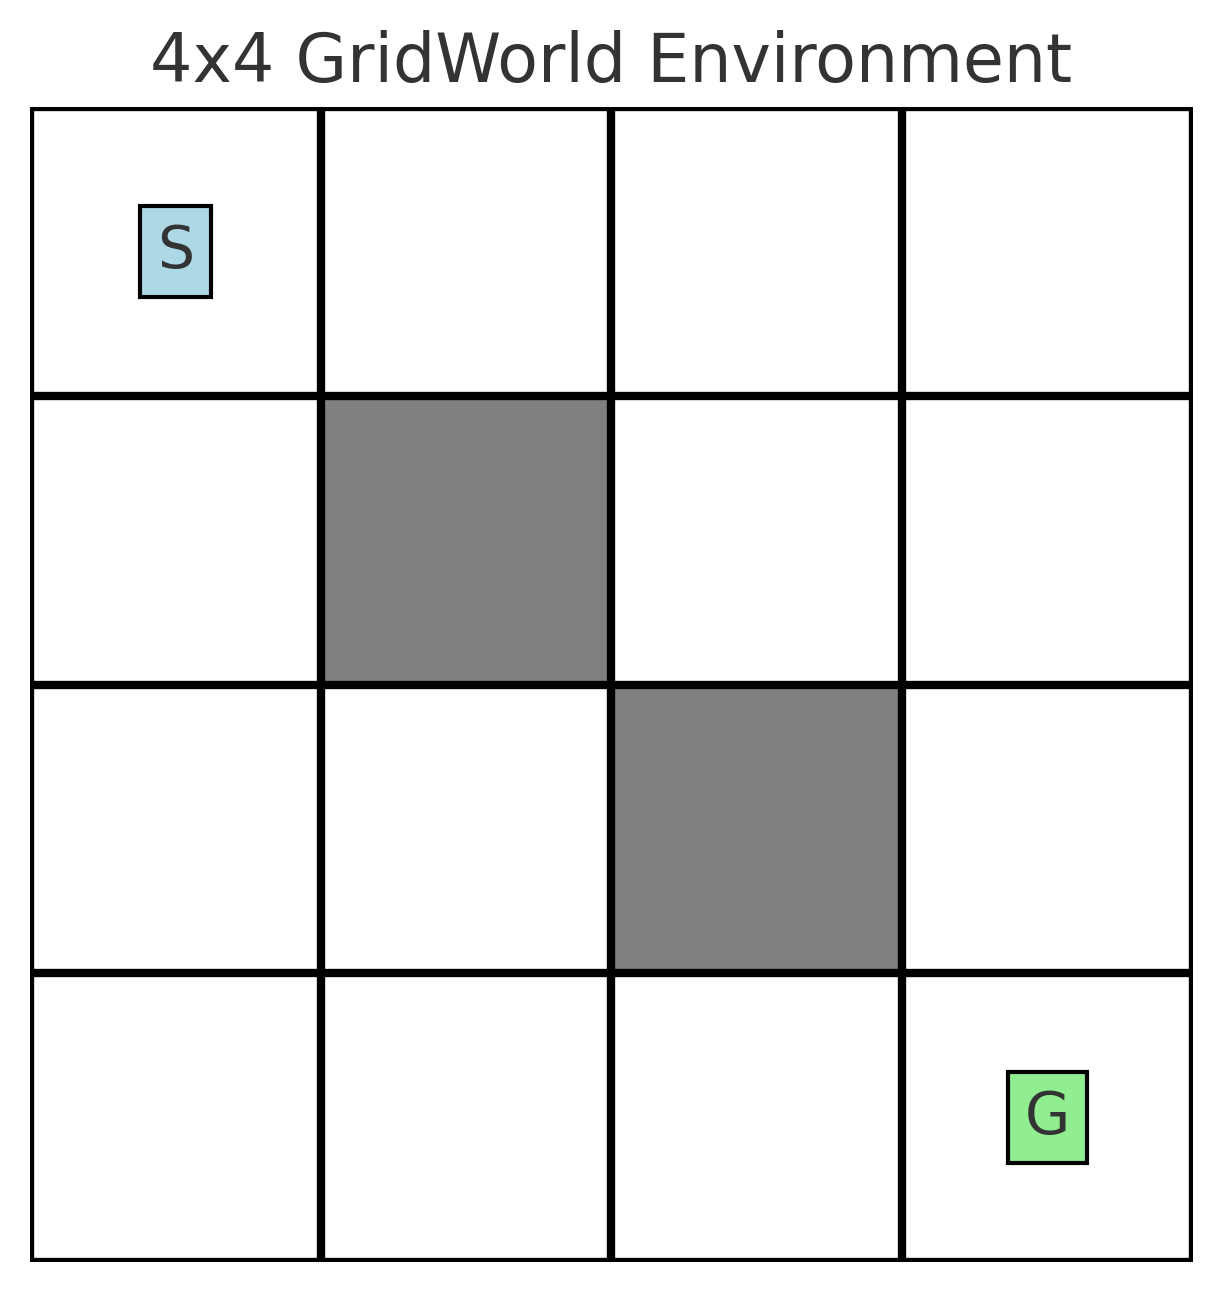

- **State Space ($ S $)**: The set of all possible states the agent can be in.
- **Action Space ($ A $)**: The set of all possible actions the agent can take.
- **Reward Function ($ R $)**: The reward the agent receives for taking an action in a given state.
- **Transition Probability ($ P $)**: The probability of transitioning to a new state given the current state and action. If the environment is deterministic, this can be omitted.

After defining the MDP components, implement problem using the **Gymnasium standard API**. Then, test the environments using various reinforcement learning algorithms (e.g., Q-Learning, DQN, PPO) and evaluate their performance.

In [63]:
from gymnasium import spaces
class YourAwesomeEnvironment(gym.Env):
    def __init__(self, size=4, obstacles=None):
        super().__init__()
        self.size = size
        self.agent_pos = [0, 0]
        self.target_pos = [size - 1, size - 1]
        obstacles = [(1, 1), (2, 2)]
        self.obstacles = set(obstacles)
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Dict({
            "agent": spaces.MultiDiscrete([size, size]),
            "target": spaces.MultiDiscrete([size, size]),
        })

    def step(self, action):
        x, y = self.agent_pos
        # Compute new position
        new_x, new_y = x, y
        if action == 0 and y > 0:   # Move Left
            new_y -= 1
        elif action == 1 and y < self.size - 1:  # Move Right
            new_y += 1
        elif action == 2 and x > 0:   # Move Up
            new_x -= 1
        elif action == 3 and x < self.size - 1:  # Move Down
            new_x += 1
        if (0 <= new_x < self.size and 0 <= new_y < self.size) and (new_x, new_y) not in self.obstacles:
            self.agent_pos = [new_x, new_y]  # Update position if it's a valid move
        reward = -0.1  # Small penalty per step
        done = False
        if self.agent_pos == self.target_pos:
            reward = 10  # Large reward for reaching the goal
            done = True  # Episode ends
        return self._get_obs(), reward, done, False, {}
    def reset(self, seed=None, options=None):
        self.agent_pos = [0, 0]  # Reset agent to start position
        return self._get_obs(), {}
    def _get_obs(self):
        return {
            "agent": np.array(self.agent_pos, dtype=np.int32),
            "target": np.array(self.target_pos, dtype=np.int32)
        }
    def render(self):
        grid = np.zeros((self.size, self.size), dtype=str)
        grid[:] = "."  # Empty space
        grid[tuple(self.target_pos)] = "G"  # Goal position
        grid[tuple(self.agent_pos)] = "A"  # Agent position
        # Place obstacles (black boxes)
        for ox, oy in self.obstacles:
            grid[ox, oy] = "X"  # Mark obstacles with 'X'

        print("\n".join(" ".join(row) for row in grid))
        print("\n")

    def close(self):
        pass

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
# TODO: Training agent on your env
env = YourAwesomeEnvironment()
obs, _ = env.reset()
env.render()

# Run a random episode (agent should not go through obstacles)
done = False
while not done:
    action = env.action_space.sample()  # Choose a random action
    obs, reward, done, _, _ = env.step(action)
    env.render()  # Show updated environment state

A . . .
. X . .
. . X .
. . . G


A . . .
. X . .
. . X .
. . . G


A . . .
. X . .
. . X .
. . . G


A . . .
. X . .
. . X .
. . . G


A . . .
. X . .
. . X .
. . . G


. . . .
A X . .
. . X .
. . . G


A . . .
. X . .
. . X .
. . . G


. . . .
A X . .
. . X .
. . . G


. . . .
A X . .
. . X .
. . . G


. . . .
A X . .
. . X .
. . . G


A . . .
. X . .
. . X .
. . . G


. . . .
A X . .
. . X .
. . . G


. . . .
. X . .
A . X .
. . . G


. . . .
. X . .
. . X .
A . . G


. . . .
. X . .
. . X .
A . . G


. . . .
. X . .
. . X .
A . . G


. . . .
. X . .
A . X .
. . . G


. . . .
. X . .
. A X .
. . . G


. . . .
. X . .
. . X .
. A . G


. . . .
. X . .
. . X .
A . . G


. . . .
. X . .
. . X .
. A . G


. . . .
. X . .
. . X .
. A . G


. . . .
. X . .
. . X .
. A . G


. . . .
. X . .
. . X .
. . A G


. . . .
. X . .
. . X .
. . A G


. . . .
. X . .
. . X .
. . . A




📊 Algorithm Comparison
Compare RL algorithms (e.g., PPO, DQN) based on:
- Total reward over time
- Sample efficiency
- Hyperparameters


In [65]:
# TODO: Algorithm comparison code
CustomResults = "./CustomEnvironmentResults"
model = PPO("MultiInputPolicy" , env , verbose = 1 , tensorboard_log = CustomResults)
model.learn(total_timesteps=10000)
del model
model = DQN("MultiInputPolicy" , env , verbose = 1 , tensorboard_log = CustomResults)
model.learn(total_timesteps=10000)
del model

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./CustomEnvironmentResults/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 67       |
|    ep_rew_mean     | 3.4      |
| time/              |          |
|    fps             | 822      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 45.4        |
|    ep_rew_mean          | 5.56        |
| time/                   |             |
|    fps                  | 570         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.017645594 |
|    clip_fraction        | 0.191       |
|    clip_range   

In [ ]:
#tensorboard --logdir ./CustomEnvironmentResults

In [66]:
#Custom Environment With Chaning the Hyperparameters :
hyperparams_list_ppo = [
    {
        "learning_rate": 3e-4,  # Slightly lower for more stable learning
        "n_steps": 2048,       # More steps per batch for better training stability
        "batch_size": 128,     # Increased batch size for smoother training
        "gamma": 0.99,         # Standard discount factor for longer-term rewards
        "clip_range": 0.2      # Default stable value
    },
    {
        "learning_rate": 7e-4,  # Slightly lower than before to reduce variance
        "n_steps": 1024,      # Shorter update steps to match higher LR
        "batch_size": 64,      # Increased batch size to balance n_steps
        "gamma": 0.97,         # Lower gamma to emphasize short-term learning
        "clip_range": 0.3      # More aggressive clipping to encourage exploration
    },
    {
        "learning_rate": 5e-4,  # Adjusted for balance between previous two
        "n_steps": 3072,       # Larger update steps for sample efficiency
        "batch_size": 256,     # Larger batch size for better convergence
        "gamma": 0.98,         # Mid-range discount factor
        "clip_range": 0.15     # More conservative clipping to prevent excessive updates
    }
]
hyperparams_list_dqn = [
    {
        "learning_rate": 8e-4,   # Slightly lower for stable Q-function updates
        "gradient_steps": 2,     # Increased slightly for better updates
        "batch_size": 128,       # Larger batch size for more stable learning
        "gamma": 0.99,           # Long-term discount factor for deep learning
        "tau": 0.95              # Adjusted to make soft updates smoother
    },
    {
        "learning_rate": 4e-4,   # Lower LR for more gradual Q-learning updates
        "gradient_steps": 5,     # More frequent updates for better Q-value estimation
        "batch_size": 64,        # Smaller batch for faster convergence
        "gamma": 0.96,           # Slightly lower discount to balance exploitation
        "tau": 0.05              # Balanced soft update
    },
    {
        "learning_rate": 3e-4,   # Conservative learning rate for long training runs
        "gradient_steps": 10,    # Higher update frequency for sample efficiency
        "batch_size": 256,       # Large batch size for stability
        "gamma": 0.98,           # Balanced discount factor
        "tau": 0.1               # Slightly faster soft update
    }
]

# Store results
hyper_paramters_ppo = "./CustomEnvironmentResultsPPOHyperParameters"
# Train PPO with different hyperparameters
for i, params in enumerate(hyperparams_list_ppo):
    print(f"\nTraining PPO with hyperparameters: {params}")
    model = PPO(
        "MultiInputPolicy", env, verbose=1,
        learning_rate=params["learning_rate"],
        n_steps=params["n_steps"],
        batch_size=params["batch_size"],
        gamma=params["gamma"],
        clip_range=params["clip_range"],
        tensorboard_log= hyper_paramters_ppo
    )
    model.learn(total_timesteps=10000)  # Train for 50,000 timesteps
    del model
hyper_paramters_dqn = "./CustomEnvironmentResultsDQNHyperParameters"
for i, params in enumerate(hyperparams_list_dqn):
    print(f"\nTraining DQN with hyperparameters: {params}")
    model = DQN(
        "MultiInputPolicy", env, verbose=1,
        learning_rate=params["learning_rate"],
        gradient_steps=params["gradient_steps"],
        batch_size=params["batch_size"],
        gamma=params["gamma"],
        tau=params["tau"],
        tensorboard_log= hyper_paramters_dqn
    )
    model.learn(total_timesteps=10000)  # Train for 50,000 timesteps
    del model


Training PPO with hyperparameters: {'learning_rate': 0.0003, 'n_steps': 2048, 'batch_size': 128, 'gamma': 0.99, 'clip_range': 0.2}
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./CustomEnvironmentResultsPPOHyperParameters/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 57.8     |
|    ep_rew_mean     | 4.32     |
| time/              |          |
|    fps             | 872      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 50.5        |
|    ep_rew_mean          | 5.05        |
| time/                   |             |
|    fps                  | 738         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096    

In [ ]:
#PPO Hyperparameters comparison
#%tensorboard --logdir ./CustomEnvironmentResultsPPOHyperParameters

In [ ]:
#DQN Hyperparameters comparison
#%tensorboard --logdir ./CustomEnvironmentResultsDQNHyperParameters

# **Task 3: Pygame 🎮 Tutorial & Custom RL Environment (Bonus)**

In this bonus task, you will implement a custom RL environment using Pygame and make it Gym-compatible for training an RL agent. Pygame is widely used for 2D game development and can be an excellent tool for creating custom RL environments. You will start by learning basic Pygame concepts (game loop, rendering, input handling), then implement a simple grid-based environment where an agent moves toward a goal while avoiding obstacles. Finally, you will train an RL agent using Stable-Baselines3 (SB3) to solve the environment. If you’re looking for inspiration, consider recreating the Chrome Dino game 🦖 as an RL environment which will be introduced at workshop or future TA sessions, but feel free to explore your own ideas!

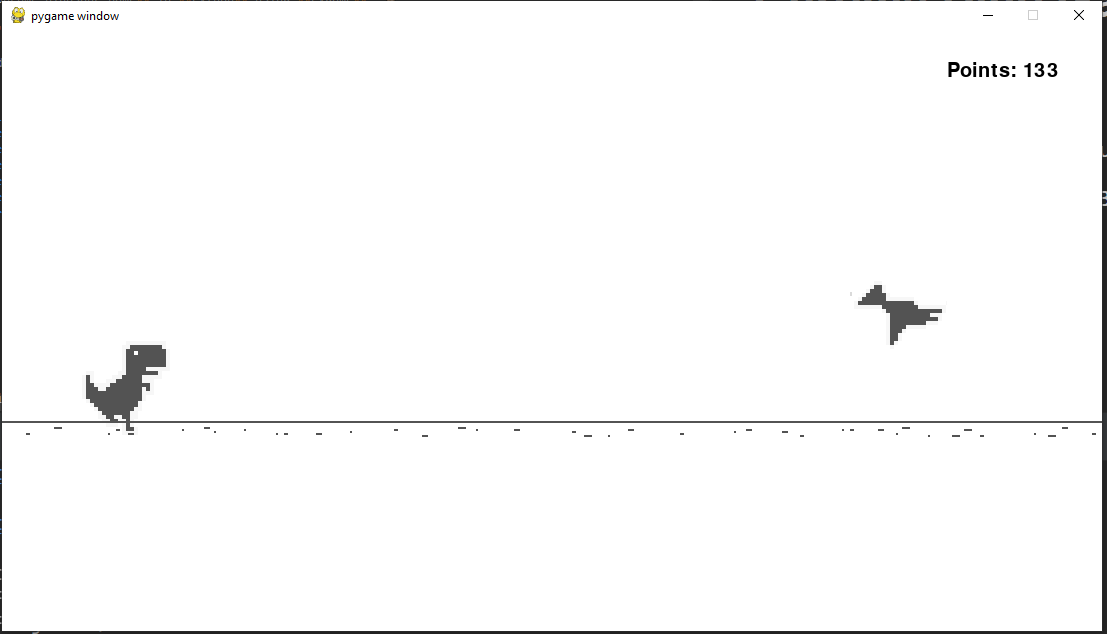

In [71]:
import pygame
from gymnasium.utils.env_checker import check_env
class GridWorldEnv(gym.Env):
    def __init__(self, grid_size=10, cell_size=40, render_mode="human"):
        self.grid_size = grid_size      # Number of cells per dimension.
        self.cell_size = cell_size      # Pixel size of each cell.
        self.width = self.grid_size * self.cell_size
        self.height = self.grid_size * self.cell_size
        self.render_mode = render_mode
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Box(low=0, high=self.grid_size - 1, shape=(2,), dtype=np.int32)
        if self.render_mode == "human":
            pygame.init()
            self.screen = pygame.display.set_mode((self.width, self.height))
            pygame.display.set_caption("GridWorld Environment")
            self.clock = pygame.time.Clock()
        self.agent_color = (0, 255, 0)
        self.goal_color = (255, 0, 0)
        self.obstacle_color = (0, 0, 255)
        self.bg_color = (255, 255, 255)
        self.reset()
    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        # Ensure the position is integer.
        self.agent_pos = np.array([0, 0], dtype=np.int32)
        self.goal_pos = np.array([self.grid_size - 1, self.grid_size - 1], dtype=np.int32)
        # Define obstacles with explicit dtype.
        self.obstacles = [
            np.array([3, 3], dtype=np.int32),
            np.array([3, 4], dtype=np.int32),
            np.array([4, 3], dtype=np.int32),
            np.array([6, 7], dtype=np.int32)
        ]
        self.done = False
        self.steps = 0
        # Return observation as int32.
        return self.agent_pos.copy(), {}
    def step(self, action):
        if self.done:
            return self.agent_pos.copy(), 0, True, False, {}
        # Process Pygame events.
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
        # Map action to movement: up, right, down, left.
        move = np.array([0, 0], dtype=np.int32)
        if action == 0:    # Up.
            move = np.array([0, -1], dtype=np.int32)
        elif action == 1:  # Right.
            move = np.array([1, 0], dtype=np.int32)
        elif action == 2:  # Down.
            move = np.array([0, 1], dtype=np.int32)
        elif action == 3:  # Left.
            move = np.array([-1, 0], dtype=np.int32)
        new_pos = self.agent_pos + move
        if 0 <= new_pos[0] < self.grid_size and 0 <= new_pos[1] < self.grid_size:
            self.agent_pos = new_pos
        self.steps += 1
        reward = -0.1  # Small penalty for each move.
        # Check collision with obstacles.
        for obs in self.obstacles:
            if np.array_equal(self.agent_pos, obs):
                reward = -5
                self.done = True
                break
        if np.array_equal(self.agent_pos, self.goal_pos):
            reward = 10
            self.done = True
        if self.steps >= 100:
            self.done = True
        return self.agent_pos.copy(), reward, self.done, False, {}
    def render(self):
        if self.render_mode is None:
            return
        self.screen.fill(self.bg_color)
        for x in range(0, self.width, self.cell_size):
            for y in range(0, self.height, self.cell_size):
                rect = pygame.Rect(x, y, self.cell_size, self.cell_size)
                pygame.draw.rect(self.screen, (200, 200, 200), rect, 1)
        for obs in self.obstacles:
            rect = pygame.Rect(obs[0] * self.cell_size, obs[1] * self.cell_size, self.cell_size, self.cell_size)
            pygame.draw.rect(self.screen, self.obstacle_color, rect)
        rect = pygame.Rect(self.goal_pos[0] * self.cell_size, self.goal_pos[1] * self.cell_size, self.cell_size, self.cell_size)
        pygame.draw.rect(self.screen, self.goal_color, rect)
        rect = pygame.Rect(self.agent_pos[0] * self.cell_size, self.agent_pos[1] * self.cell_size, self.cell_size, self.cell_size)
        pygame.draw.rect(self.screen, self.agent_color, rect)

        pygame.display.flip()
        self.clock.tick(30)
    def close(self):
        if self.render_mode is not None:
            pygame.quit()
env = GridWorldEnv(grid_size=10, cell_size=40)
check_env(env, skip_render_check=True)
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)
# Save the trained model.
model.save("ppo_gridworld")
obs, info = env.reset()
for _ in range(100):
    action, _states = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    env.render()
    if terminated or truncated:
        obs, info = env.reset()
pygame.time.wait(3000)
env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 52.3     |
|    ep_rew_mean     | -9.25    |
| time/              |          |
|    fps             | 1011     |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 64.5        |
|    ep_rew_mean          | -9.48       |
| time/                   |             |
|    fps                  | 695         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011090329 |
|    clip_fraction        | 0.152       |
|    clip_range           | 0.2         |
|    entropy_loss   